In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#US Honey Case Study

##Importing and getting basic idea of data

In [4]:
data=pd.read_csv('US_honey_dataset.csv')
data.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [5]:
data.columns

Index(['Unnamed: 0', 'state', 'colonies_number', 'yield_per_colony',
       'production', 'stocks', 'average_price', 'value_of_production', 'year'],
      dtype='object')

##Cleaning the data
**1.   Dropping unwanted column**

In [6]:
data=data.drop(['Unnamed: 0'],axis=1)      #axis=0 indicates rows, axis=1 indicates columns
data.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


**2.   Checking for null values and removing them if present**

In [7]:
data.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

**3.   Removing Duplicate values**

In [8]:
data.duplicated().sum()

0

**4.   Checking for Outliers from graphs like Boxplot or Violin plot**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab40b42110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab40b42650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab40ad2a40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab40b42b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab40b42e30>],
 'means': []}

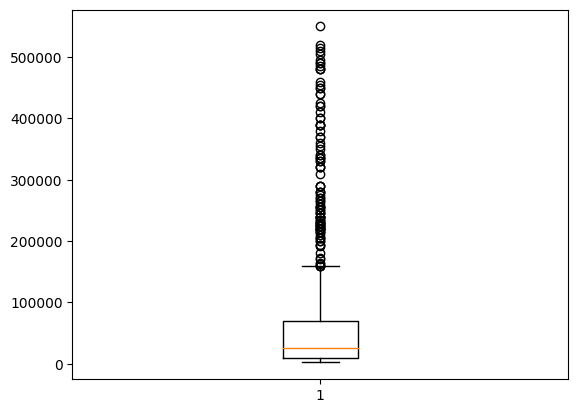

In [9]:
plt.boxplot(data['colonies_number'])

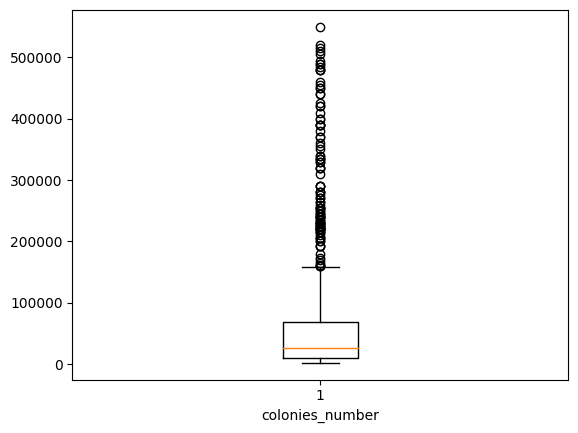

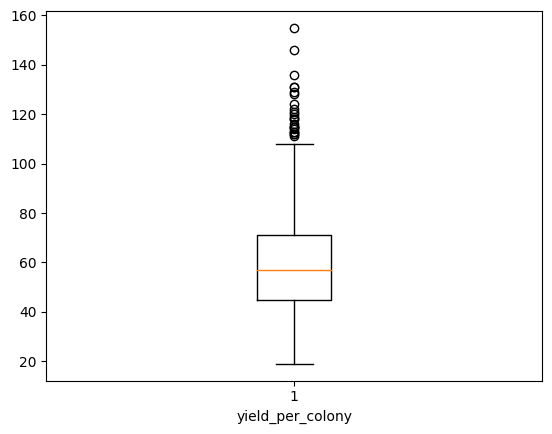

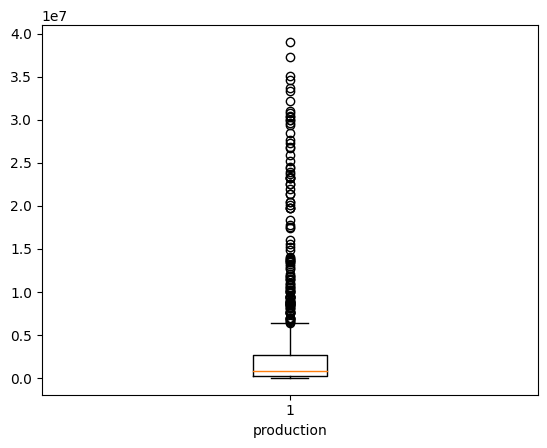

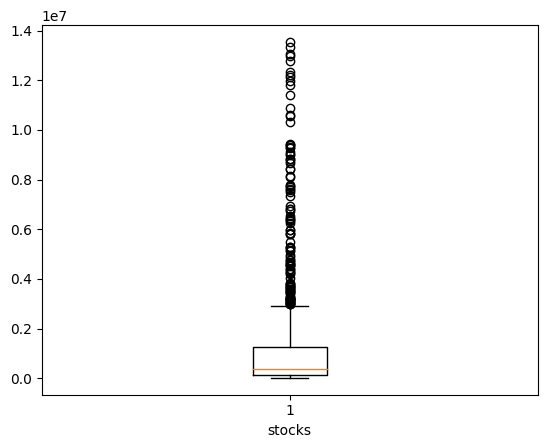

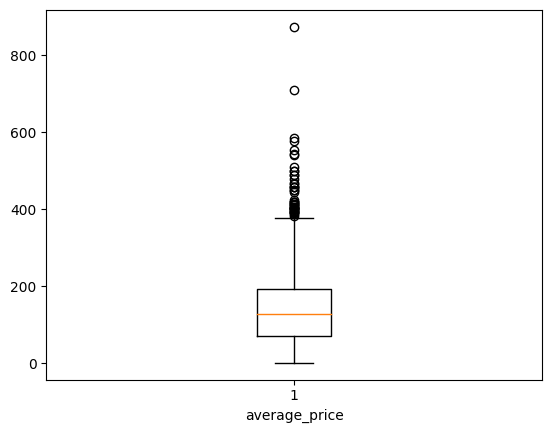

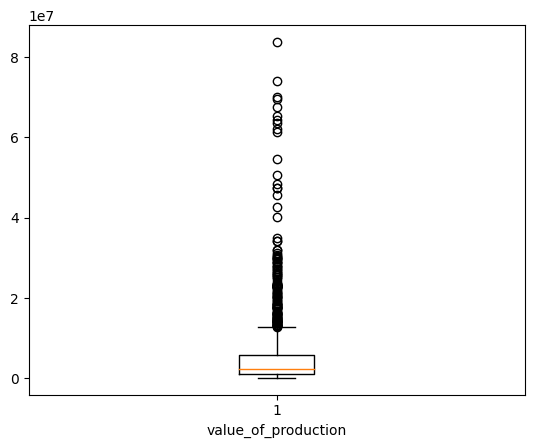

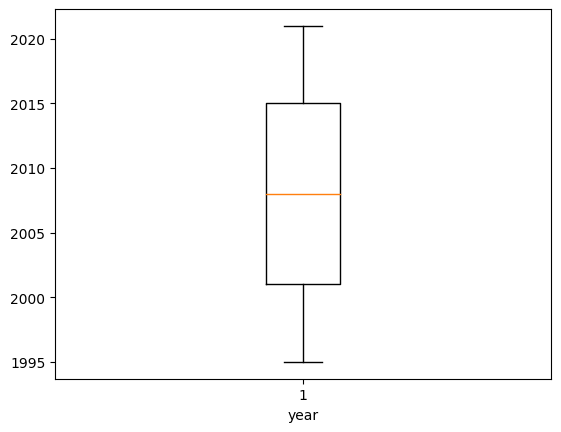

In [10]:
for col in data.columns:
    if data[col].dtype!='object':
        plt.boxplot(data[col])
        plt.xlabel(col)
        plt.show()

If dataset contains >=50% outliers, then don't directly remove the outliers as it will leave very small amount of data on which analysis would be performed.

Instead use other techniques like quartile to deal with outliers in which outliers are replaced instead of direct removal

##Analyzing the data

###Q1

Q.1) Which states are rarely contributing to honey production since last 27 years?

In [11]:
data['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
data['state'].nunique()

44

In [13]:
states_data=data['state'].value_counts()
states_data

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

From above list, we can observe that Maryland & Oklahoma has given the least contribution among all the states in the last 27 years. We can try to get the same inference by means of visualization below

In [14]:
state_index=states_data.index
state_index

Index(['Alabama', 'Missouri', 'Arizona', 'NewJersey', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'SouthDakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'WestVirginia', 'Wisconsin', 'Montana', 'Nebraska',
       'Mississippi', 'Minnesota', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Louisiana', 'Maine', 'Michigan', 'Wyoming', 'Kentucky',
       'NewMexico', 'Nevada', 'SouthCarolina', 'Oklahoma', 'Maryland'],
      dtype='object')

In [15]:
state_values=states_data.values
state_values

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 26, 18, 15, 12,  9,  9])

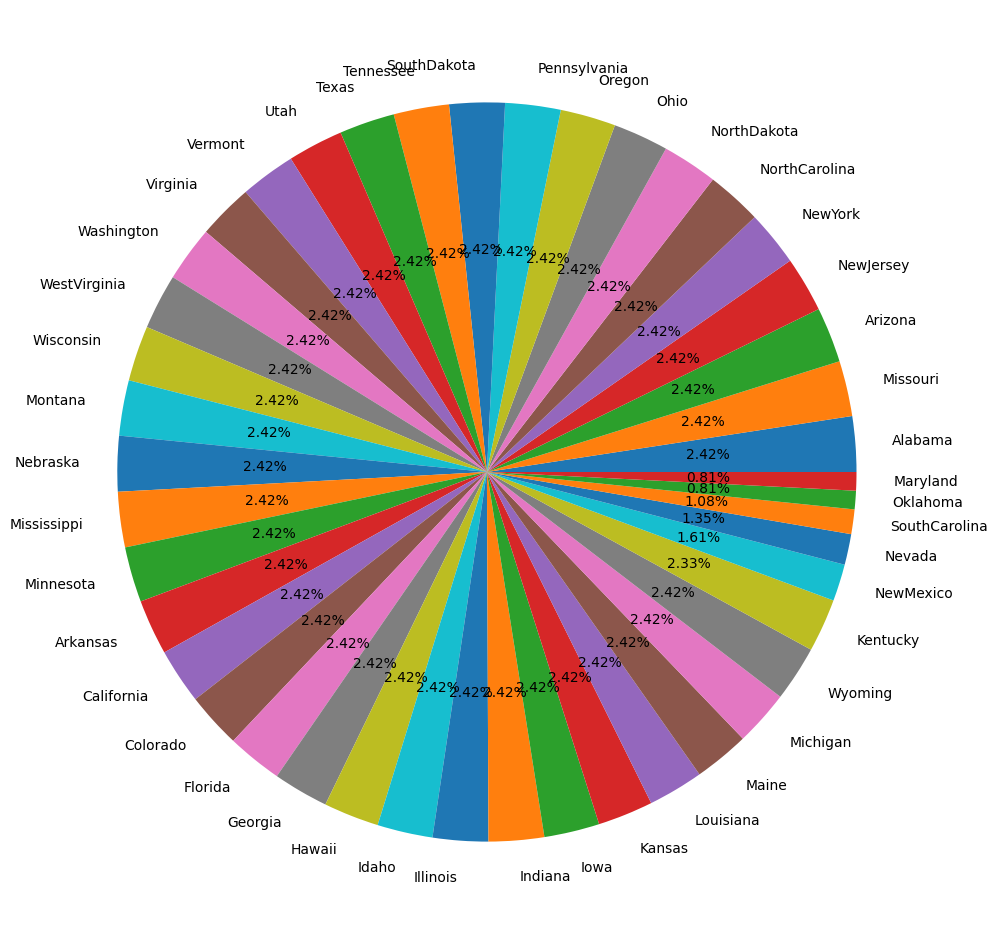

In [16]:
plt.figure(figsize=(12,12))
plt.pie(state_values,labels=state_index,autopct='%0.2f%%')
plt.show()

**Inference for Q1:** Following 5 states are having the least contribution for honey production since the last 27 years - 'NewMexico', 'Nevada', 'SouthCarolina', 'Oklahoma', 'Maryland'

###Q2

Q.2) Which are the top 5 honey producing states?

In [17]:
state_sum=data.groupby('state').sum()['production'].reset_index()
state_sum=state_sum.sort_values(by='production',ascending=False)
state_sum.head()

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


From above dataframe, we can observe that NorthDakota, California, SouthDakota, Florida and Montana are the top 5 honey producing states. We can try to get the same inference by means of visualization below

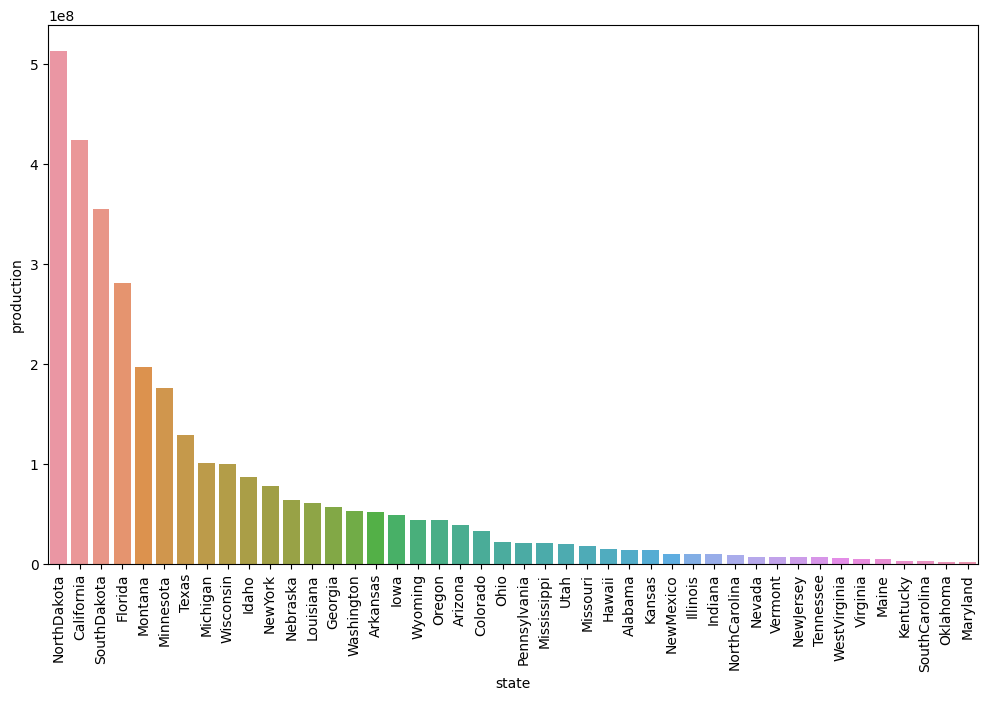

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(data=state_sum,x='state',y='production')
plt.xticks(rotation=90)
plt.show()
#alternatively we can directly use a dataframe which contains only the top 5 values by using 'head' function

**Inference for Q2:** Following 5 states are the top 5 honey producing states - NorthDakota, California, SouthDakota, Florida and Montana

###Q3

Q.3) What is the change in mean average price of honey from 1995 to 2021?

In [19]:
year_mean=data.groupby('year')['average_price'].mean().reset_index()
year_mean.head()

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581


We can try to get the inference by means of visualization below

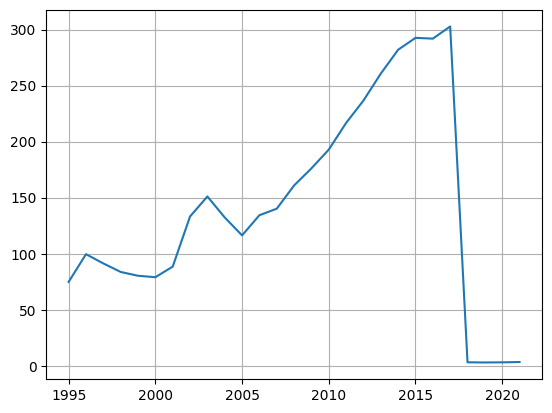

In [20]:
plt.plot(year_mean['year'],year_mean['average_price'])
plt.grid()
plt.show()

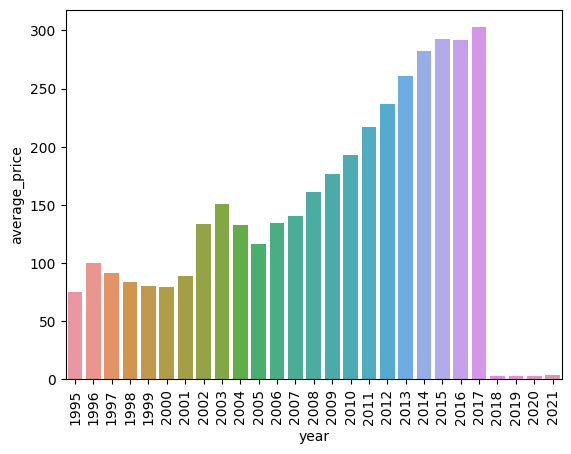

In [21]:
sns.barplot(data=year_mean,x='year',y='average_price')
plt.xticks(rotation=90)
plt.show()

**Inference for Q3:**  The average price was increasing from 1995 until 2017. There has been a drastic fall in mean average price of honey from 2017 to 2018 and has remained almost constantly low for 4 years after this

###Q4

Q.4) Which year had the highest honey production in US?

In [22]:
year_sum=data.groupby('year')['production'].sum().reset_index()
year_sum=year_sum.sort_values(by='production',ascending=False)
year_sum.head()

,year,production
5,2000,220320000
3,1998,219321000
0,1995,210272000
4,1999,204585000
1,1996,197995000


From above dataframe, we can observe that year 2000 has the highest honey production in the US. We can try to get the same inference by means of visualization below

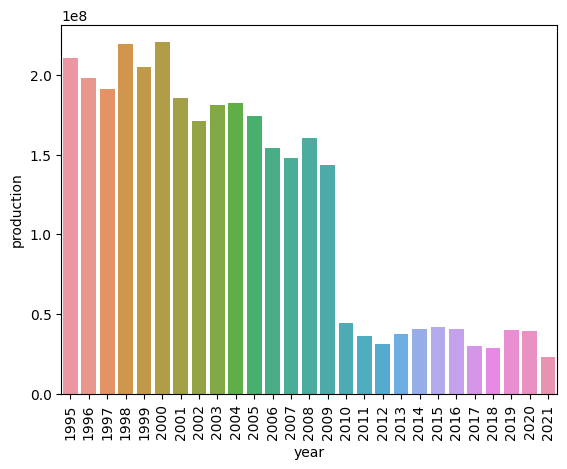

In [23]:
sns.barplot(data=year_sum,x='year',y='production')
plt.xticks(rotation=90)
plt.show()
#below graph x axis is not sorted from largest to smallest as it is a numerical data type, so it is ordered sequentially.
#For above bar graph, it is sorted largest to smallest as x axis is object data type

**Inference for Q4:** Year 2000 has had the highest honey production in US throughout the duration of 27 years from 1995 to 2021

###Q5

Q.5) From above inference, find out the state that had the highest honey production that year.

In [25]:
data_2000=data[data['year']==2000]
data_2000.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000


In [30]:
stateProduction_2000=data_2000[['state','production']].sort_values(by='production',ascending=False)
stateProduction_2000.head()

,state,production
245,NorthDakota,33350000
220,California,30800000
250,SouthDakota,28435000
222,Florida,24360000
235,Minnesota,13500000


From above dataframe, we can observe that North Dakota had highest production in 2000. We can try to get the same inference by means of visualization below

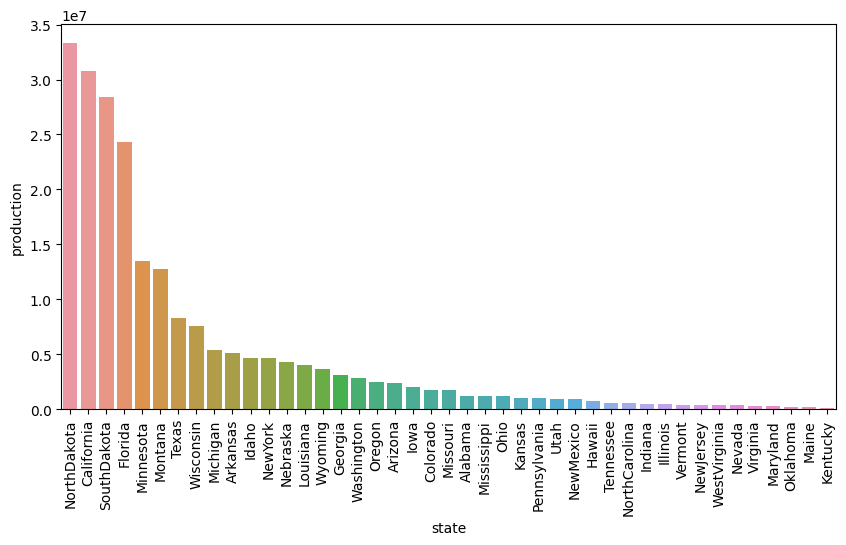

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(data=stateProduction_2000,x='state',y='production')
plt.xticks(rotation=90)
plt.show()

**Inference for Q5:** North Dakota is the state which had the highest honey production in the year 2000

###Q6

Q.6) Which states are having highest number of colonies in the year 2000?

In [32]:
stateColonies_2000=data_2000[['state','colonies_number']].sort_values(by='colonies_number',ascending=False)
stateColonies_2000.head()

,state,colonies_number
220,California,440000
245,NorthDakota,290000
250,SouthDakota,235000
222,Florida,232000
235,Minnesota,150000


From above dataframe, we can observe that California had highest number of colonies in 2000. We can try to get the same inference by means of visualization below

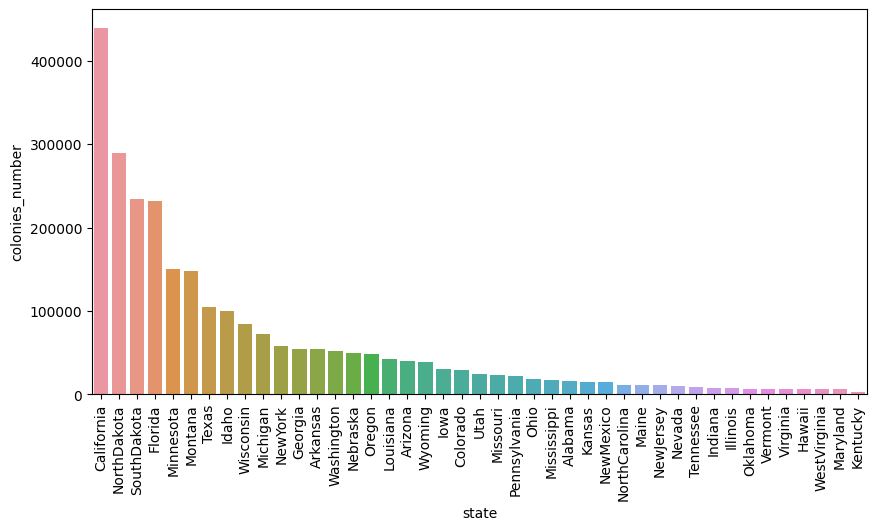

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=stateColonies_2000,x='state',y='colonies_number')
plt.xticks(rotation=90)
plt.show()

**Inference for Q6:** California is the state which had the highest number of colonies in the year 2000 even though North Dakota was the highest honey producing state in 2000.